In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('netflix_titles_nov_2019.csv')

In [4]:
df.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show


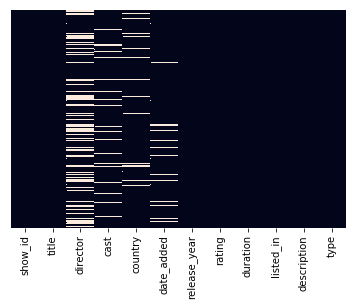

In [5]:
sns.heatmap(df.isnull(),yticklabels= False, cbar=False)

In [6]:
df['title'].count()

5837

In [7]:
df['director'].nunique()

3108

In [8]:
df1 = df.groupby(['director']).size().reset_index(name='count')
df1 = df1.nlargest(10,columns='count')

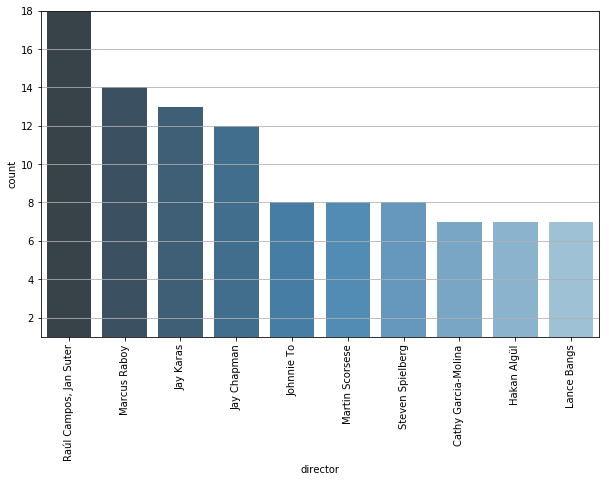

In [9]:
plt.figure(figsize=(10,6))
g =sns.barplot(data=df1,x='director',y='count',palette="Blues_d")
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.ylim(1,18)
plt.show()

Top 10 directors who has produced maximum number of shows on NetFlix

In [10]:
df2 = df.groupby(['cast']).size().reset_index(name='count')
df2 = df2.nlargest(10,columns='count')

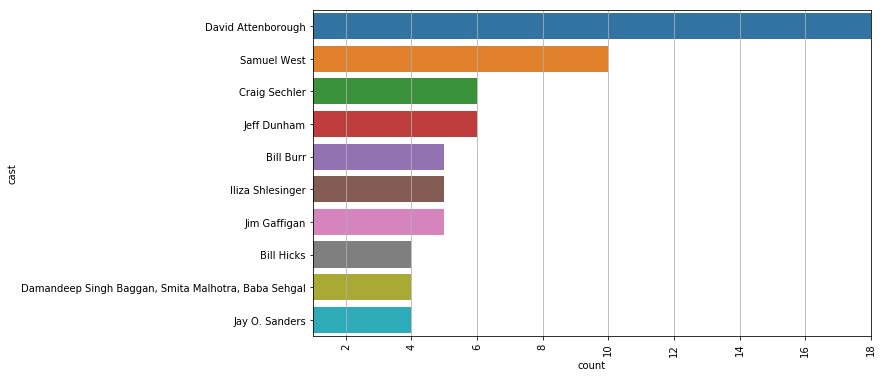

In [11]:
plt.figure(figsize=(10,6))
g =sns.barplot(data=df2,x='count',y='cast')
plt.xticks(rotation=90)
plt.grid(axis='x')
plt.xlim(1,18)
plt.show()

Most starred actors on NetFlix

In [12]:
df['country'].nunique()

527

In [13]:
df3 = df.groupby(['country','listed_in','type']).size().reset_index(name='count')
df3 = df3.nlargest(30,columns='count')

In [14]:
df3['listed_in'].nunique(dropna=True)

29

In [15]:
df3

,country,listed_in,type,count
1564,United States,Documentaries,Movie,201
1656,United States,Stand-Up Comedy,Movie,173
627,India,"Dramas, International Movies",Movie,98
606,India,"Comedies, Dramas, International Movies",Movie,75
626,India,"Dramas, Independent Movies, International Movies",Movie,74
1466,United States,Children & Family Movies,Movie,60
1469,United States,"Children & Family Movies, Comedies",Movie,54
1629,United States,Kids' TV,TV Show,54
789,Japan,"Anime Series, International TV Shows",TV Show,53
1588,United States,Dramas,Movie,53


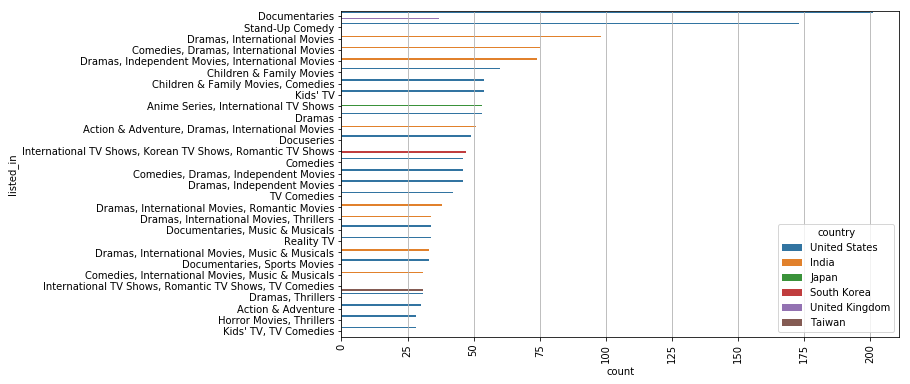

In [19]:
plt.figure(figsize=(10,6))
g =sns.barplot(data=df3,x='count',y='listed_in',hue='country')
plt.xticks(rotation=90)
plt.grid(axis='x')

plt.show()









Leading contributors in NetFlix across the world

In [23]:

df_corr= df.groupby(['cast','director']).size().reset_index(name='count')
df_corr = df_corr.nlargest(15,columns='count')
df_corr

,cast,director,count
2590,"Prabhas, Rana Daggubati, Anushka Shetty, Taman...",S.S. Rajamouli,4
431,Bill Burr,Jay Karas,3
764,Dave Chappelle,Stan Lathan,3
771,David Attenborough,Alastair Fothergill,3
2001,Louis C.K.,Louis C.K.,3
2591,"Prabhas, Rana Daggubati, Anushka Shetty, Taman...",S.S. Rajamouli,3
2631,Rachael Stirling,Edward Cotterill,3
2883,Sam Kinison,Walter C. Miller,3
2892,"Samantha Ruth Prabhu, Lakshmi, Rajendraprasad,...",B. V. Nandini Reddy,3
3206,"Taapsee Pannu, Vinodhini, Parvathi T, Ramya Su...",Ashwin Saravanan,3


Actors who has casted multiple movies with same directors.

In [24]:
df_corr.iloc[5,0]

'Prabhas, Rana Daggubati, Anushka Shetty, Tamannaah Bhatia, Sathyaraj, Ramya Krishnan, Nassar, Subbaraju'

In [25]:
df_corr.iloc[0,0]

'Prabhas, Rana Daggubati, Anushka Shetty, Tamannaah Bhatia, Sathyaraj, Nassar, Ramya Krishnan, Sudeep'

In [26]:
df['rating'].unique()

array(['TV-14', 'TV-G', 'TV-Y', 'TV-MA', 'TV-PG', 'R', 'TV-Y7', 'PG', 'G',
       'PG-13', 'TV-Y7-FV', 'NR', 'UR', 'NC-17', nan], dtype=object)

<Figure size 720x432 with 0 Axes>

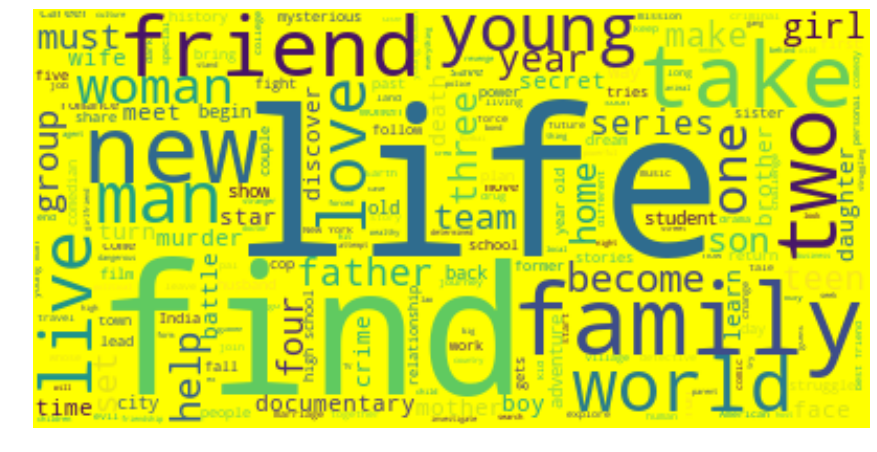

In [29]:
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in df.description)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=200, background_color="yellow").generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()




In [30]:
df['date_added'].count()

5195

In [31]:
df['year'] = pd.DatetimeIndex(df['date_added']).year
#df[df['year']<2010].drop()
df['year'].columns =['num','year']

year = df[df['year']>2009]




In [36]:
import plotly.offline as pyo
import plotly.graph_objs as go

typedf1 = year.groupby('type').size()/df['type'].count()*100
labels = typedf1.index
values = typedf1.values

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.2)])
                
                
fig.show()          
            



NefFlix still favours movies rather than TV shows based on lat 10 years of data.


In [37]:


df["date_added"] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [38]:
d1 = df[df["type"] == "TV Show"]
d2 = df[df["type"] == "Movie"]

col = "year_added"

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

trace1 = go.Scatter(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#a678de"))
trace2 = go.Scatter(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#6ad49b"))
data = [trace1, trace2]
layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()